In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean

%matplotlib inline
plt.rcParams["font.size"] = 14

In [ ]:
data_dir = '/home/gkara/Documents/for-tide_paper/'
bathy = xr.open_mfdataset(data_dir + 'bathy_meter.nc')
bathy = bathy.set_coords(['nav_lon', 'nav_lat'])

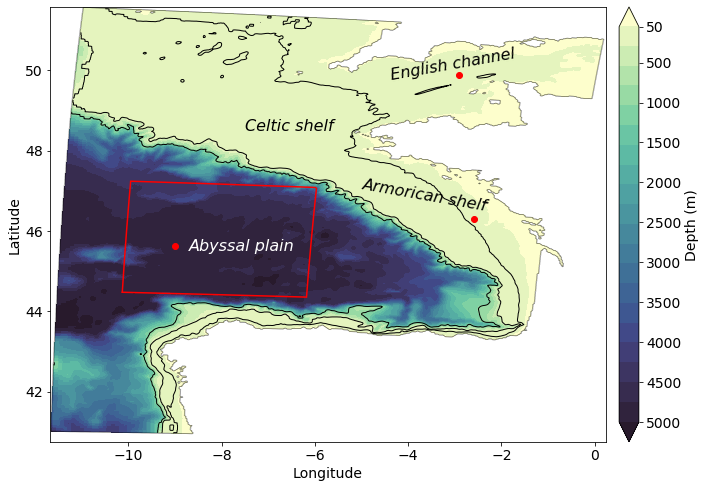

In [12]:
mask = np.isnan(bathy.Bathymetry)
#
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
vmin = 50
vmax = 5000
levels = np.linspace(vmin,vmax,21, endpoint=True)
im = bathy.Bathymetry.plot.contourf(ax=ax0, x='nav_lon', y='nav_lat', levels=levels, vmin=vmin, vmax=vmax, \
                               cmap=cmocean.cm.deep, add_colorbar=False)
mask.plot.contour(ax=ax0, x='nav_lon', y='nav_lat', linewidths=0.1, colors='k')
bathy.Bathymetry.plot.contour(ax=ax0, x='nav_lon', y='nav_lat', levels=[100,200, 1000], linewidths=1, colors='k')

# plot colorbar 
cbar_ticks = [50, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
cb = plt.colorbar(im, ticks=cbar_ticks, pad=0.02, label='Depth (m)'); cb.ax.invert_yaxis()

# Add text to plot
ax0.text(-8.7, 45.5, 'Abyssal plain', rotation=0, style = 'italic', fontsize=16,color='w',
 horizontalalignment='left')
ax0.text(-5, 46.5, 'Armorican shelf',rotation=-10, style = 'italic', fontsize=16,color='k',
 horizontalalignment='left')
ax0.text(-7.5, 48.5, 'Celtic shelf', style = 'italic', fontsize=16,color='k',
 horizontalalignment='left')
ax0.text(-4.4, 49.75, 'English channel', rotation =10, style = 'italic', fontsize=16,color='k',
 horizontalalignment='left')
    
ax0.scatter(-9.01,45.62, color='r') # 1. Abbysal plain > x=88, y=230
ax0.scatter(-2.59,46.3, color='r') # 2. Armorican shelf 88,230 > x=312, y=278
ax0.scatter(-2.90,49.89, color='r') # 3. english channel > x=286, y=470

# plot the box
box_lon=[] ; box_lat = []
#
box_lon.append(bathy.nav_lon[170, 50:190].values)
box_lat.append(bathy.nav_lat[170, 50:190].values)
#
box_lon.append(bathy.nav_lon[310, 50:190].values)
box_lat.append(bathy.nav_lat[310, 50:190].values)
#
box_lon.append(bathy.nav_lon[170:310,50].values)
box_lat.append(bathy.nav_lat[170:310,50].values)
#
box_lon.append(bathy.nav_lon[170:310,190].values)
box_lat.append(bathy.nav_lat[170:310,190].values)

for i in range(4):
    ax0.plot(box_lon[i],box_lat[i], 'r')

#save figure
fig.savefig('../_plots/figure1.png',dpi=300,bbox_inches='tight')